In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

In [181]:
data = pd.read_csv("data/cancer.csv", encoding='latin-1')
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   MedianAgeMale  MedianAgeFemale                     Geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   AvgHouseholdSize  PercentMarried  PctNoHS18_24  PctHS18_24  \
0              2.54            52.5          11.5        39.5   
1              2.34            44.5           6.1        22.4   
2              2.62            54.2          24.0        36.6   
3              2.52            52.7          20.2        41.2   
4              2.34            57.8          14.9        43.0   

   PctSomeCol18_24  PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
0             42.1              6.9          23.2               19.6   
1             64.0              7.5          26.0               22.7   
2              NaN              9.5          29.0               16.0   
3             36.1              2.5          31.6                9.3   
4             40.0              2.0          33.4               15.0   

   PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0                51.9                   8.0                75.1   
1                55.9                   7.8                70.2   
2                45.9                   7.0                63.7   
3                48.3                  12.1                58.4   
4                48.2                   4.8                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN                41.6               32.9   
1                     53.8                43.6               31.1   
2                     43.5                34.9               42.1   
3                     40.3                35.0               45.3   
4                     43.9                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657

In [182]:
pd.set_option('display.max_columns', None)

## Scatter Plots to check for the Linearity assumption, based on these plots I'll choose variables who seem to have a linear relaionship with the target 

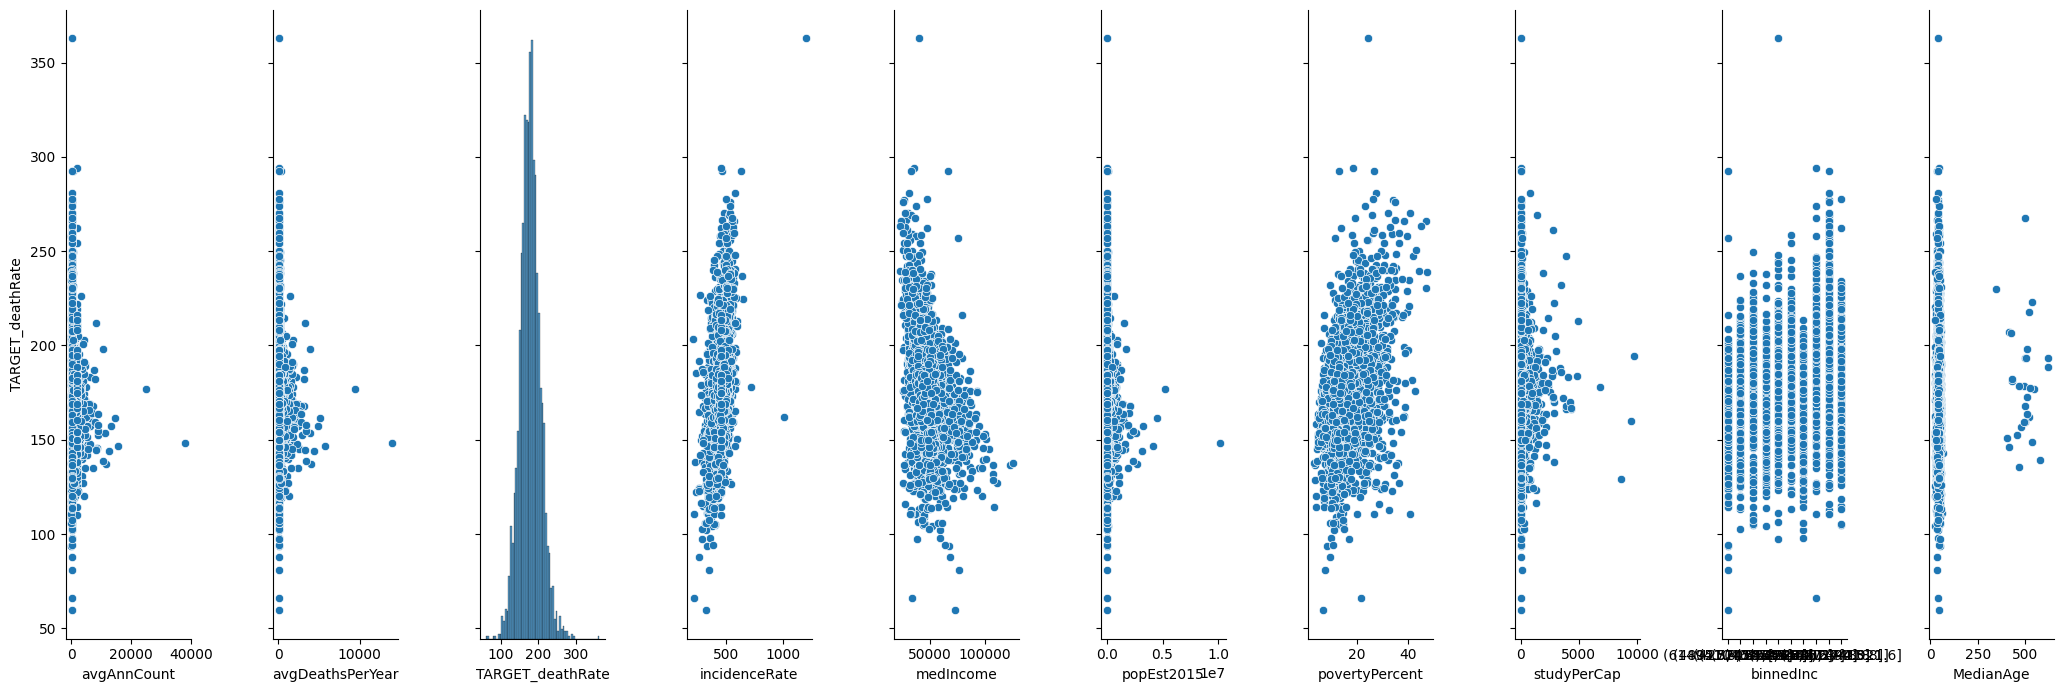

In [84]:
sns.pairplot(data, x_vars=[i for i in data.columns[0:10]], y_vars='TARGET_deathRate', height=7, aspect=0.3)


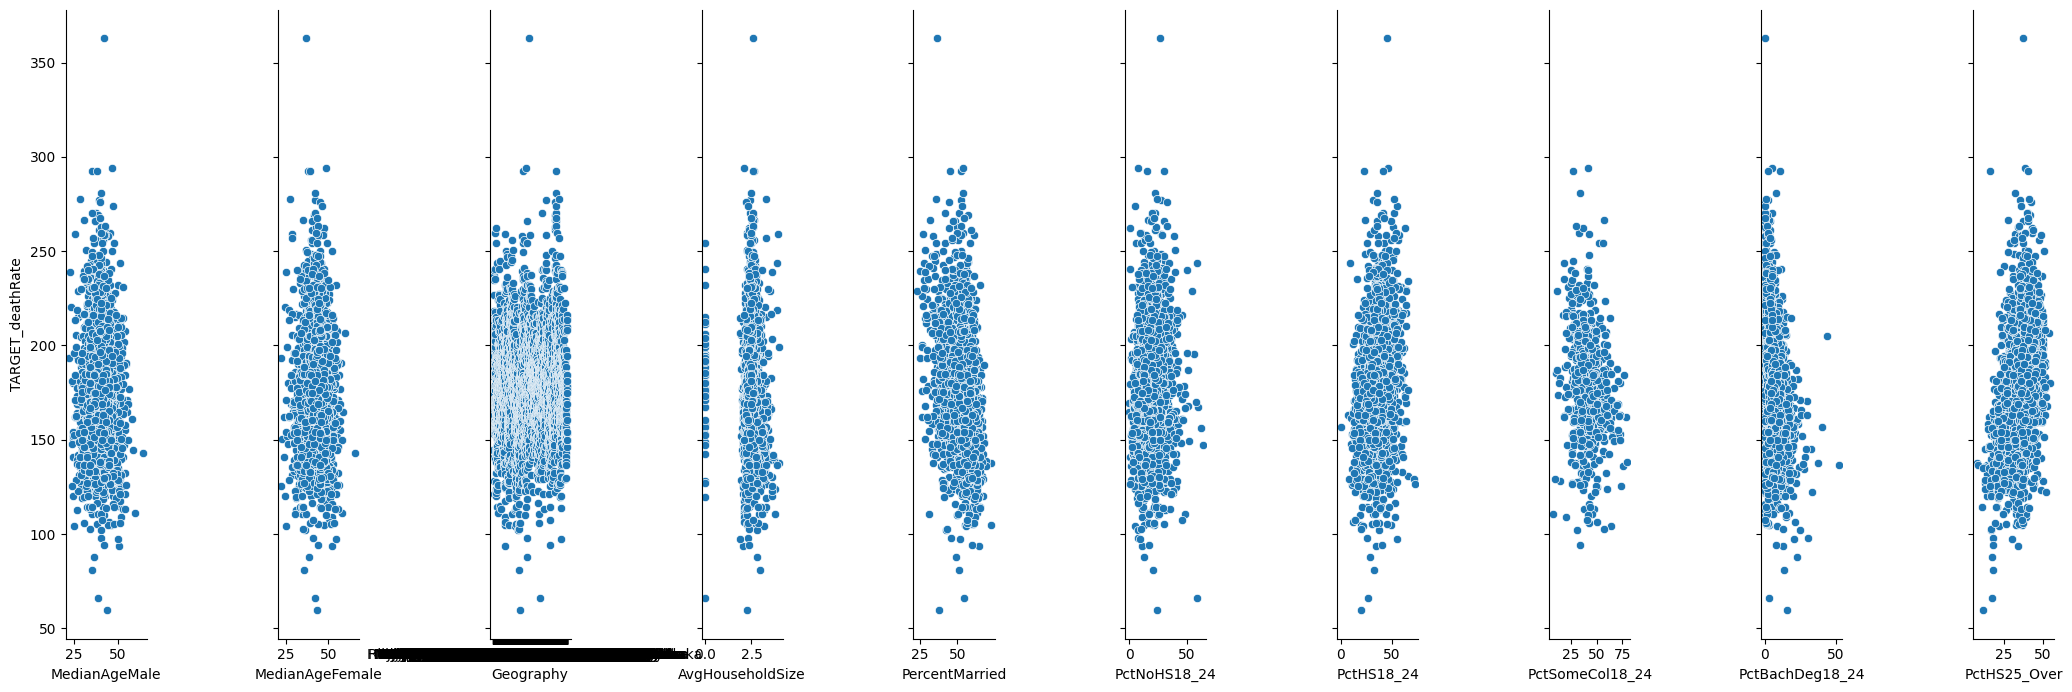

In [85]:
sns.pairplot(data, x_vars=[i for i in data.columns[10:20]], y_vars='TARGET_deathRate', height=7, aspect=0.3)

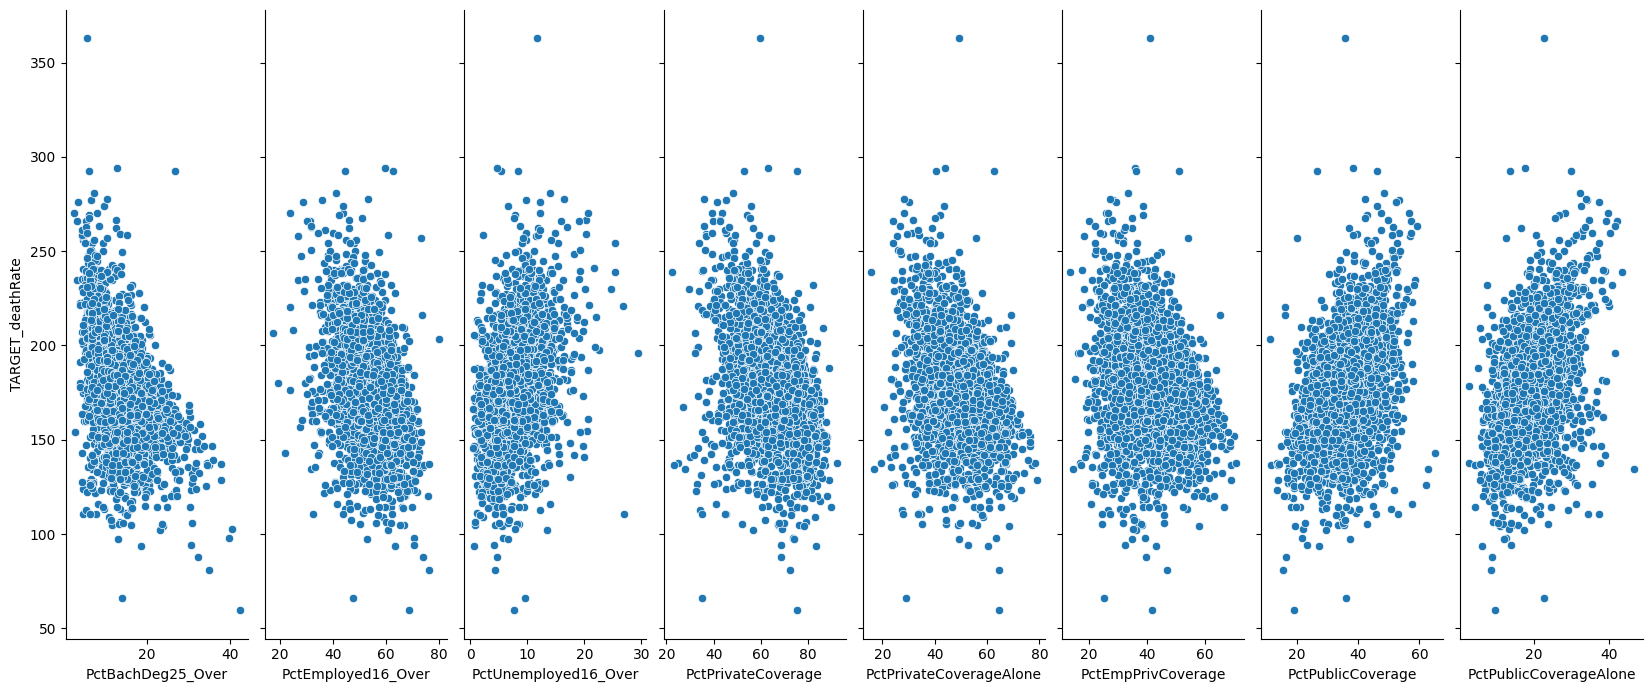

In [86]:
sns.pairplot(data, x_vars=[i for i in data.columns[20:28]], y_vars='TARGET_deathRate', height=7, aspect=0.3)

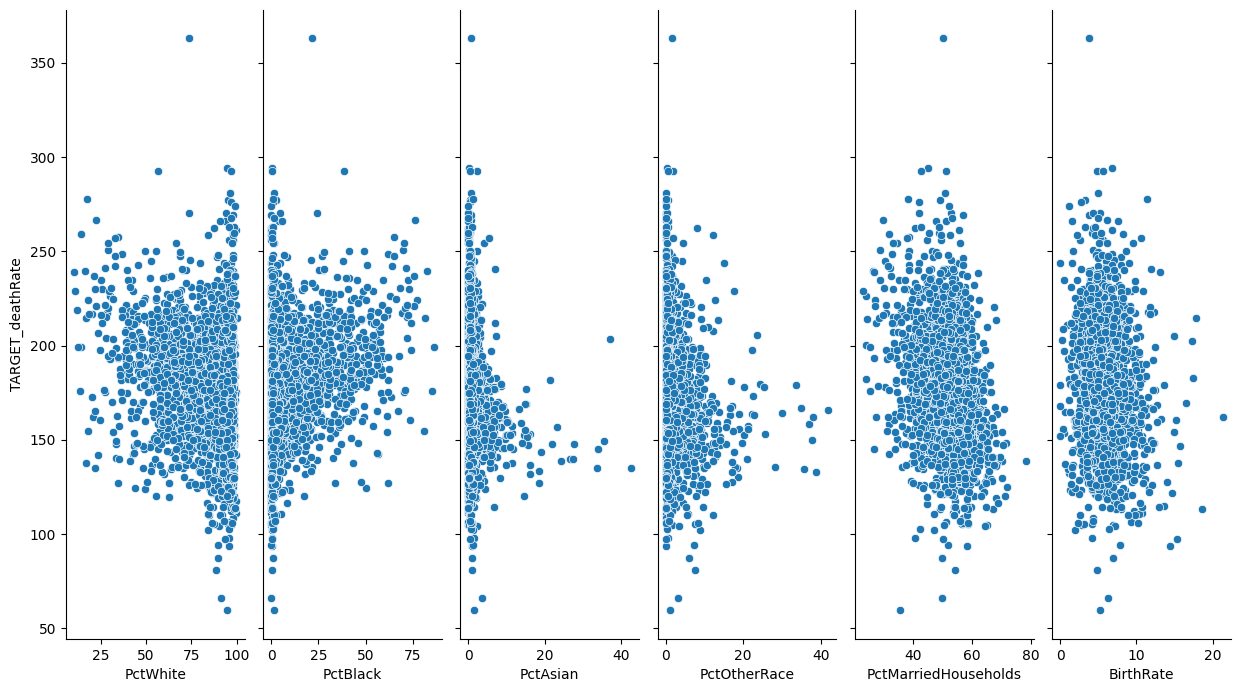

In [87]:
sns.pairplot(data, x_vars=[i for i in data.columns[28:]], y_vars='TARGET_deathRate', height=7, aspect=0.3)

### Based on the scatter plots I chose the next columns :

povertyPercent

medianIncome

incidenceRate

PctEmployed16_over

PctUnemployed16_over

PctBachDeg25_over

PctPrivateCoverage

PctPrivateCoverageAlone

PctEmpPrivCoverage

PctPublicCoverage

PctPublicCoverageAlone

## Next Step is to check for Collinearity between the chosen predictors

In [9]:
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   MedianAgeMale  MedianAgeFemale                     Geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   AvgHouseholdSize  PercentMarried  PctNoHS18_24  PctHS18_24  \
0              2.54            52.5          11.5        39.5   
1              2.34            44.5           6.1        22.4   
2              2.62            54.2          24.0        36.6   
3              2.52            52.7          20.2        41.2   
4              2.34            57.8          14.9        43.0   

   PctSomeCol18_24  PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
0             42.1              6.9          23.2               19.6   
1             64.0              7.5          26.0               22.7   
2              NaN              9.5          29.0               16.0   
3             36.1              2.5          31.6                9.3   
4             40.0              2.0          33.4               15.0   

   PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0                51.9                   8.0                75.1   
1                55.9                   7.8                70.2   
2                45.9                   7.0                63.7   
3                48.3                  12.1                58.4   
4                48.2                   4.8                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN                41.6               32.9   
1                     53.8                43.6               31.1   
2                     43.5                34.9               42.1   
3                     40.3                35.0               45.3   
4                     43.9                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [183]:
# Define target and predictors

y = data['TARGET_deathRate']

X = data[['povertyPercent', 'medIncome', 'incidenceRate', 'PctEmployed16_Over', 'PctUnemployed16_Over',
         'PctBachDeg25_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
         'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone']]

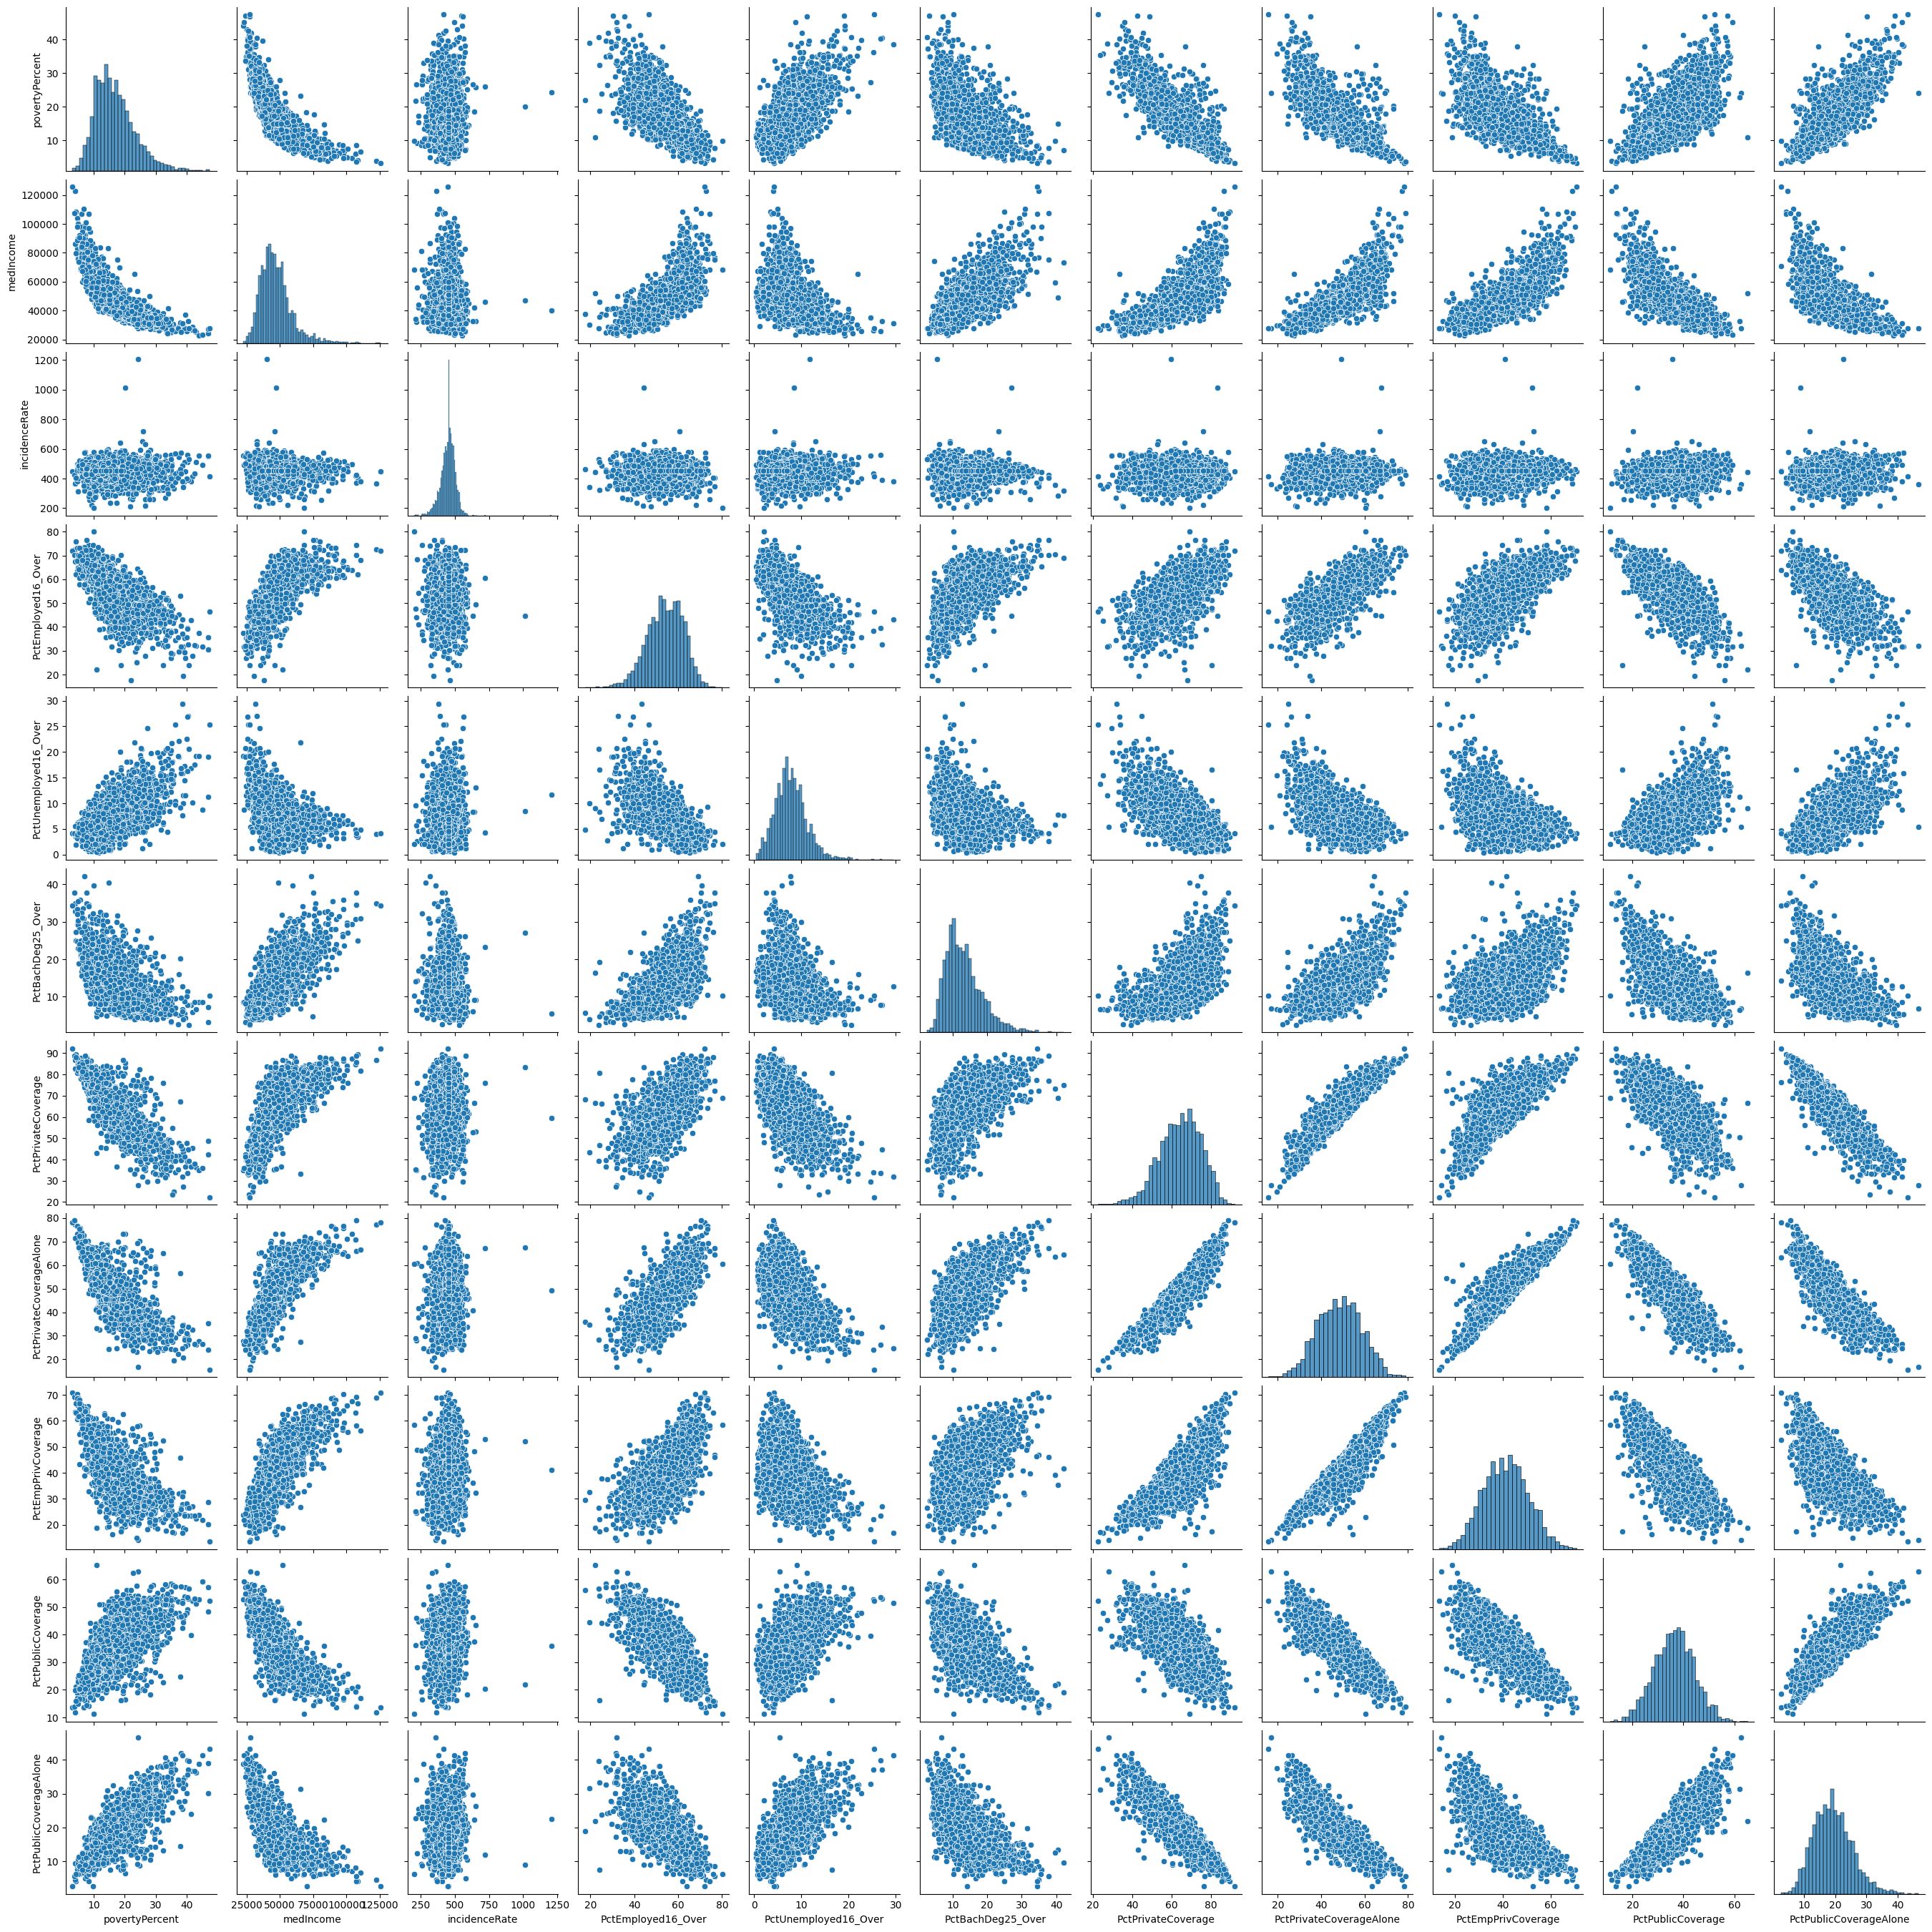

In [96]:
sns.pairplot(X)

In [97]:

X.corr()

povertyPercent  medIncome  incidenceRate  \
povertyPercent                 1.000000  -0.788965       0.009046   
medIncome                     -0.788965   1.000000      -0.001036   
incidenceRate                  0.009046  -0.001036       1.000000   
PctEmployed16_Over            -0.736767   0.693432       0.004906   
PctUnemployed16_Over           0.655148  -0.453108       0.099979   
PctBachDeg25_Over             -0.531600   0.704928      -0.038177   
PctPrivateCoverage            -0.822534   0.724175       0.105174   
PctPrivateCoverageAlone       -0.761672   0.788048       0.109278   
PctEmpPrivCoverage            -0.683100   0.747294       0.149825   
PctPublicCoverage              0.651162  -0.754822       0.046109   
PctPublicCoverageAlone         0.798642  -0.719756       0.040812   

                         PctEmployed16_Over  PctUnemployed16_Over  \
povertyPercent                    -0.736767              0.655148   
medIncome                          0.693432             -0.453108   
incidenceRate                      0.004906              0.099979   
PctEmployed16_Over                 1.000000             -0.648114   
PctUnemployed16_Over              -0.648114              1.000000   
PctBachDeg25_Over                  0.616773             -0.372980   
PctPrivateCoverage                 0.698886             -0.634317   
PctPrivateCoverageAlone            0.782595             -0.582054   
PctEmpPrivCoverage                 0.702786             -0.474745   
PctPublicCoverage                 -0.771217              0.529821   
PctPublicCoverageAlone            -0.711735              0.655366   

                         PctBachDeg25_Over  PctPrivateCoverage  \
povertyPercent                   -0.531600           -0.822534   
medIncome                         0.704928            0.724175   
incidenceRate                    -0.038177            0.105174   
PctEmployed16_Over                0.616773            0.698886   
PctUnemployed16_Over             -0.372980           -0.634317   
PctBachDeg25_Over                 1.000000            0.603248   
PctPrivateCoverage                0.603248            1.000000   
PctPrivateCoverageAlone           0.652307            0.933496   
PctEmpPrivCoverage                0.539084            0.827459   
PctPublicCoverage                -0.636095           -0.720012   
PctPublicCoverageAlone           -0.605760           -0.886234   

                         PctPrivateCoverageAlone  PctEmpPrivCoverage  \
povertyPercent                         -0.761672           -0.683100   
medIncome                               0.788048            0.747294   
incidenceRate                           0.109278            0.149825   
PctEmployed16_Over                      0.782595            0.702786   
PctUnemployed16_Over                   -0.582054           -0.474745   
PctBachDeg25_Over                       0.652307            0.539084   
PctPrivateCoverage                      0.933496            0.827459   
PctPrivateCoverageAlone                 1.000000            0.929105   
PctEmpPrivCoverage                      0.929105            1.000000   
PctPublicCoverage                      -0.862075           -0.778315   
PctPublicCoverageAlone                 -0.856100           -0.728823   

                         PctPublicCoverage  PctPublicCoverageAlone  
povertyPercent                    0.651162                0.798642  
medIncome                        -0.754822               -0.719756  
incidenceRate                     0.046109                0.040812  
PctEmployed16_Over               -0.771217               -0.711735  
PctUnemployed16_Over              0.529821                0.655366  
PctBachDeg25_Over                -0.636095               -0.605760  
PctPrivateCoverage               -0.720012               -0.886234  
PctPrivateCoverageAlone          -0.862075               -0.856100  
PctEmpPrivCoverage               -0.778315               -0.728823  
PctPublicCoverage  

In [112]:
from sklearn.impute import SimpleImputer
# Impute with the mean
imputer = SimpleImputer(strategy='mean')
Xv = X.copy()

imputer.fit(Xv[['PctPrivateCoverageAlone']])
Xv['PctPrivateCoverageAlone'] = imputer.transform(Xv[['PctPrivateCoverageAlone']])
imputer.fit(Xv[['PctEmployed16_Over']])
Xv['PctEmployed16_Over'] = imputer.transform(Xv[['PctEmployed16_Over']])


In [113]:
Xv.isnull().sum()

povertyPercent             0
medIncome                  0
incidenceRate              0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctBachDeg25_Over          0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
dtype: int64

In [114]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xv.columns                 

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xv.values, i)
                          for i in range(len(X.columns))]

In [115]:
vif_data

feature         VIF
0            povertyPercent   31.509204
1                 medIncome   70.043051
2             incidenceRate   79.622132
3        PctEmployed16_Over  111.590697
4      PctUnemployed16_Over   13.985262
5         PctBachDeg25_Over   16.852388
6        PctPrivateCoverage  488.510688
7   PctPrivateCoverageAlone  139.152463
8        PctEmpPrivCoverage  132.696547
9         PctPublicCoverage  244.412950
10   PctPublicCoverageAlone  186.245623

### As seen in the VIF results and in scatter plots there's a high Multicollinearity between the chosen predictors, I'll try centering the data(subtracting the mean) 

In [147]:
X['incidenceRate'].mean()

448.2685858065638

In [148]:
# Create a fuction to center the data

for i in Xv.columns :
    mean = Xv[i].mean()
    Xv[i] = Xv[i].map(lambda x : x - mean )

In [149]:
Xv.apply(np.mean)

povertyPercent            -1.548410e-15
medIncome                  9.169569e-13
incidenceRate              2.835642e-14
PctEmployed16_Over         5.335483e-15
PctUnemployed16_Over      -2.005470e-16
PctBachDeg25_Over         -8.954657e-16
PctPrivateCoverage         3.264719e-15
PctPrivateCoverageAlone   -1.026054e-15
PctEmpPrivCoverage        -4.010940e-15
PctPublicCoverage          2.108076e-15
PctPublicCoverageAlone     1.725637e-16
dtype: float64

In [150]:
# Let's see the VIF dataframe after centering the data 
vifc_data = pd.DataFrame()
vifc_data["feature"] = Xv.columns                 

# calculating VIF for each feature
vifc_data["VIF"] = [variance_inflation_factor(Xv.values, i)
                          for i in range(len(X.columns))]

In [151]:
vifc_data

feature        VIF
0            povertyPercent   6.444045
1                 medIncome   5.448961
2             incidenceRate   1.163493
3        PctEmployed16_Over   3.705013
4      PctUnemployed16_Over   2.303557
5         PctBachDeg25_Over   2.508801
6        PctPrivateCoverage  15.171503
7   PctPrivateCoverageAlone   4.703711
8        PctEmpPrivCoverage   6.779591
9         PctPublicCoverage  12.349781
10   PctPublicCoverageAlone  17.113759

### So data-centering solves the multicollinearity for most of the predictors so I'll remove the rest whose VIF is still high and apply those changes to the main features matrix

## Dealing with Missing Values

In [120]:
X.isnull().sum()[data.isnull().sum() > 0] / len(X)

PctEmployed16_Over         0.049885
PctPrivateCoverageAlone    0.199869
dtype: float64

<AxesSubplot:>

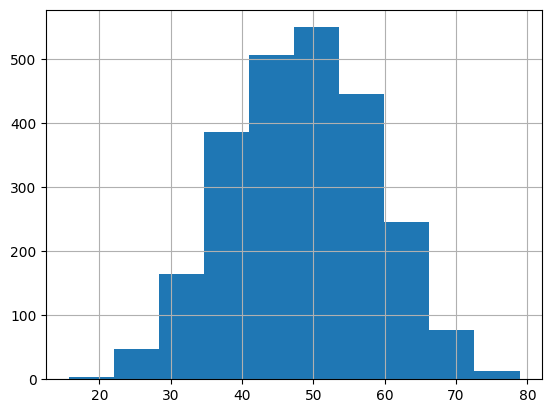

In [95]:
X.PctPrivateCoverageAlone.hist()

<AxesSubplot:>

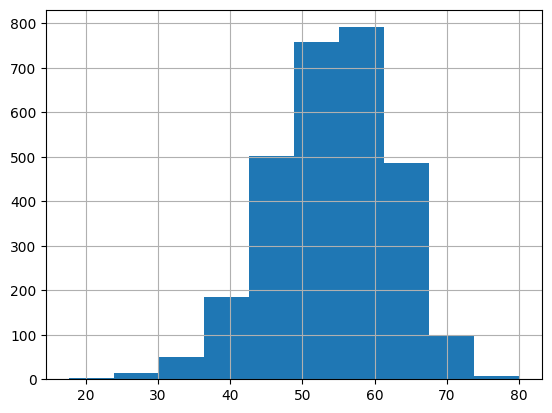

In [93]:
X.PctEmployed16_Over.hist()

### Here I'll split the data train / test before I  impute the missing values to avoid data leakage

In [184]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [185]:
# Filling the missing values with the mean given that the distributions are normal

imputer = SimpleImputer(strategy="mean")
X_train['PctEmployed16_Over'] = imputer.fit_transform(X_train[['PctEmployed16_Over']])
X_test['PctEmployed16_Over'] = imputer.transform(X_test[['PctEmployed16_Over']])

X_train['PctPrivateCoverageAlone'] = imputer.fit_transform(X_train[['PctPrivateCoverageAlone']])
X_test['PctPrivateCoverageAlone'] = imputer.transform(X_test[['PctPrivateCoverageAlone']])

In [132]:
X_test.isnull().sum()

povertyPercent             0
medIncome                  0
incidenceRate              0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctBachDeg25_Over          0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
dtype: int64

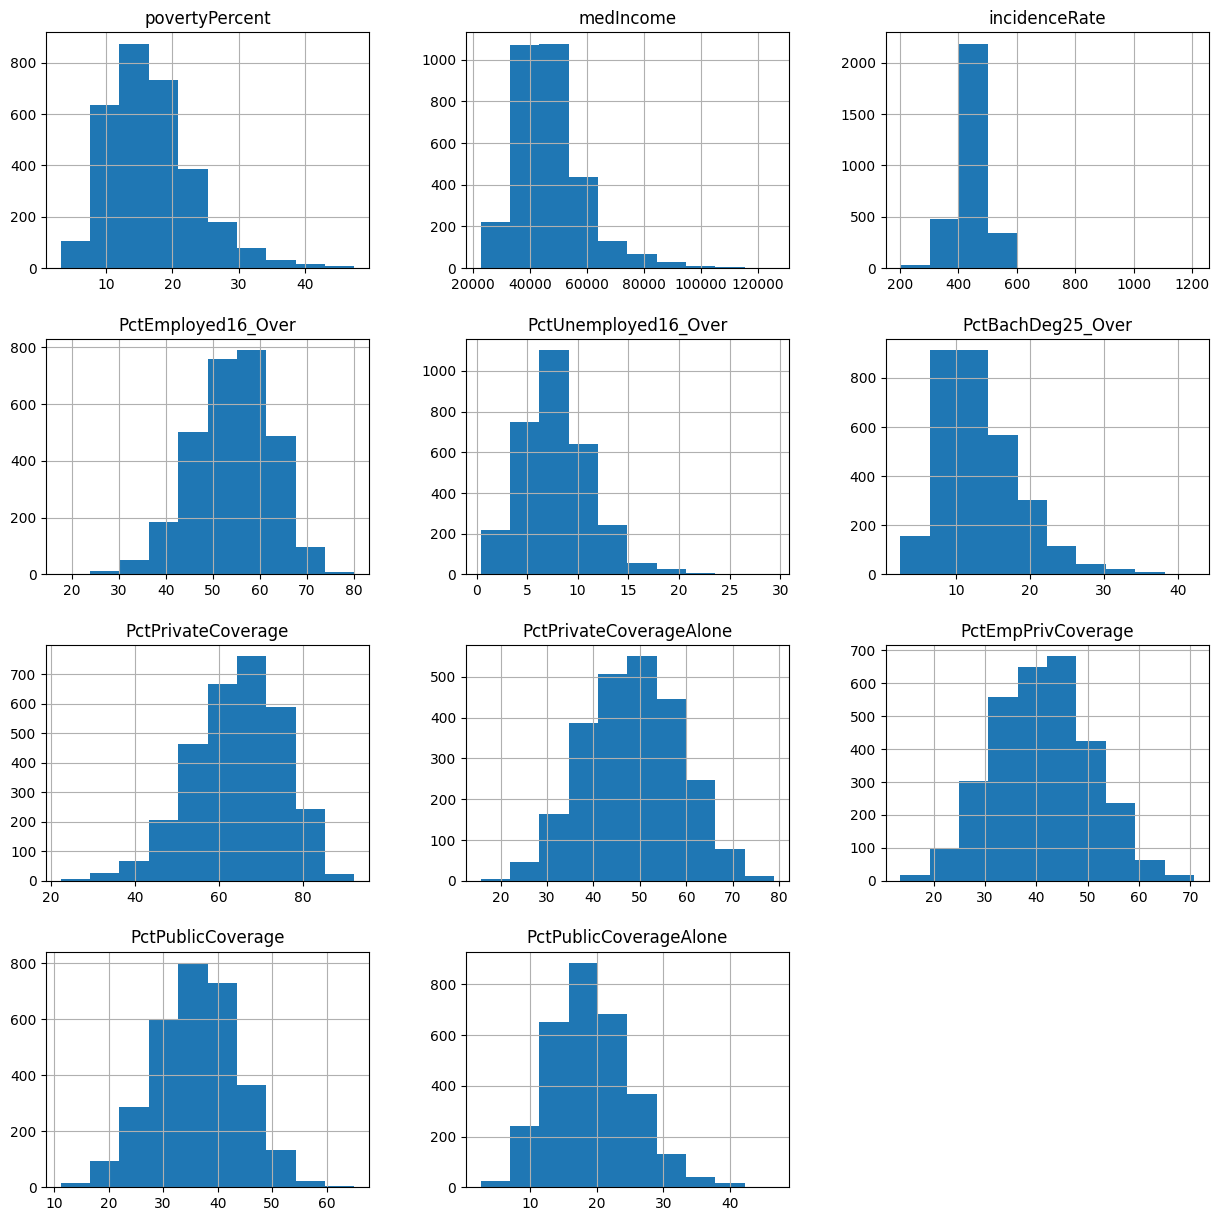

In [155]:
X.hist(figsize=(15,15));

/home/zein/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incidenceRate'>

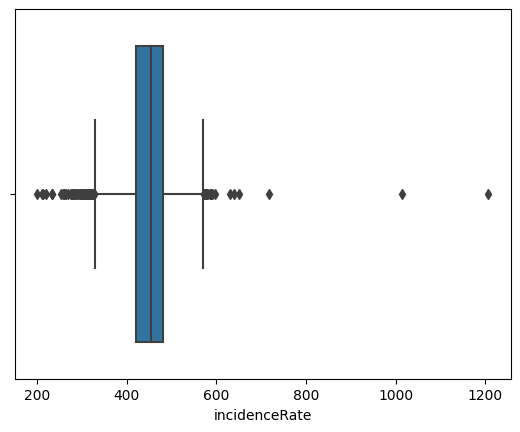

In [157]:
sns.boxplot(X['incidenceRate'])

### Given that all predictors are normally distributed, I'll apply Standardization as a Feature Scaling method, and apply Robust Scale on incidenceRate because it has some outliers

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

for i in X.loc[:, X.columns != 'incidenceRate'].columns :
    imputer = StandardScaler()
    X_train[i] = imputer.fit_transform(X_train[[i]])
    X_test[i] = imputer.transform(X_test[[i]])
    
imputer = RobustScaler()
X_train['incidenceRate'] = imputer.fit_transform(X_train[['incidenceRate']])
X_test['incidenceRate'] = imputer.transform(X_test[['incidenceRate']])

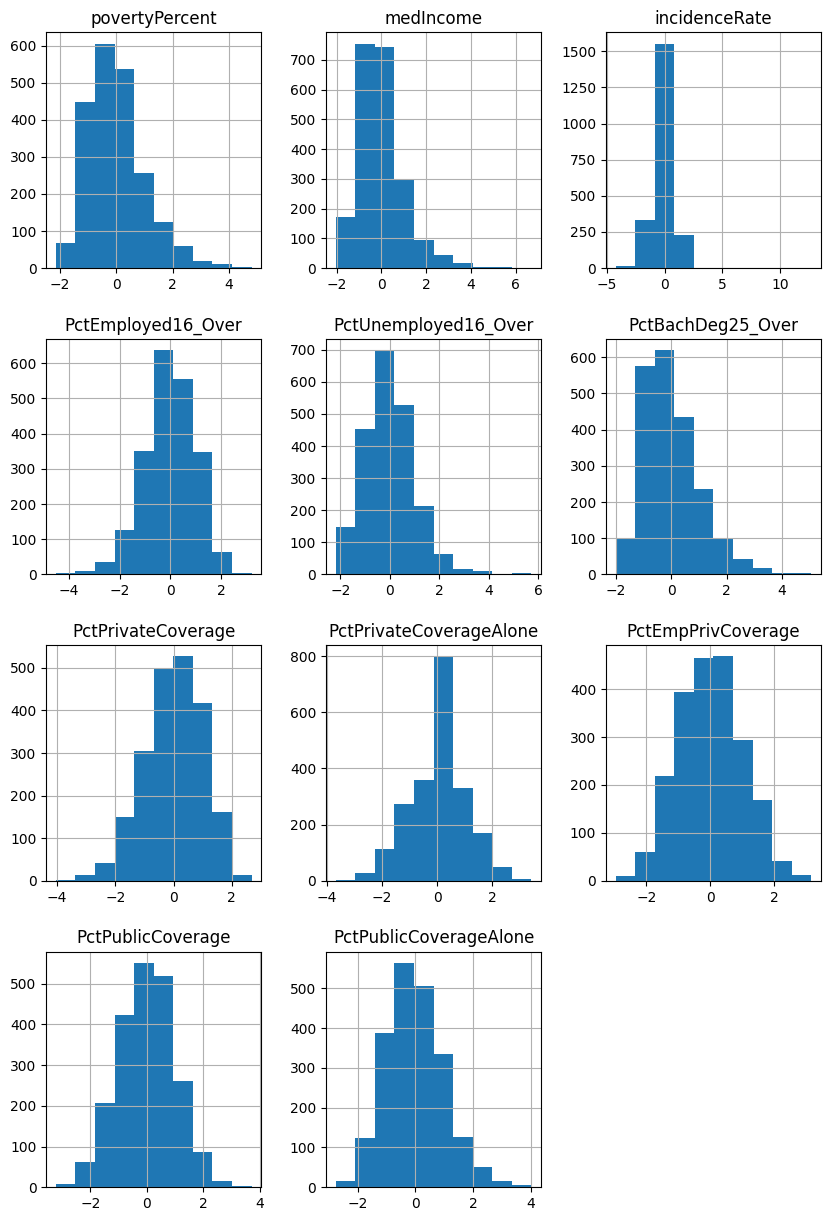

In [163]:
X_train.hist(figsize=(10,15));

In [190]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.4315995666783593

In [191]:
X_tr = X_train[['povertyPercent', 'medIncome', 'incidenceRate', 'PctEmployed16_Over',
               'PctUnemployed16_Over', 'PctBachDeg25_Over',
              'PctPrivateCoverageAlone', 'PctEmpPrivCoverage']]

X_te = X_test[['povertyPercent', 'medIncome', 'incidenceRate', 'PctEmployed16_Over',
               'PctUnemployed16_Over', 'PctBachDeg25_Over',
              'PctPrivateCoverageAlone', 'PctEmpPrivCoverage']]

model.fit(X_tr, y_train)

model.score(X_te, y_test)

0.42726046702502274

In [177]:
d = data.dropna(axis = 1)

X_d = d.loc[:, ~d.columns.isin(['TARGET_deathRate', 'Geography', 'binnedInc'])]

y_d = d['TARGET_deathRate']

In [193]:
model.fit(X_d, y_d)

LinearRegression()

In [194]:
for i in X_d.loc[:, X_d.columns != 'incidenceRate'].columns :
    imputer = StandardScaler()
    X_train[i] = imputer.fit_transform(X_train[[i]])
    X_test[i] = imputer.transform(X_test[[i]])
model.score(X_d, y_d)

KeyError: "None of [Index(['avgAnnCount'], dtype='object')] are in the [columns]"